In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

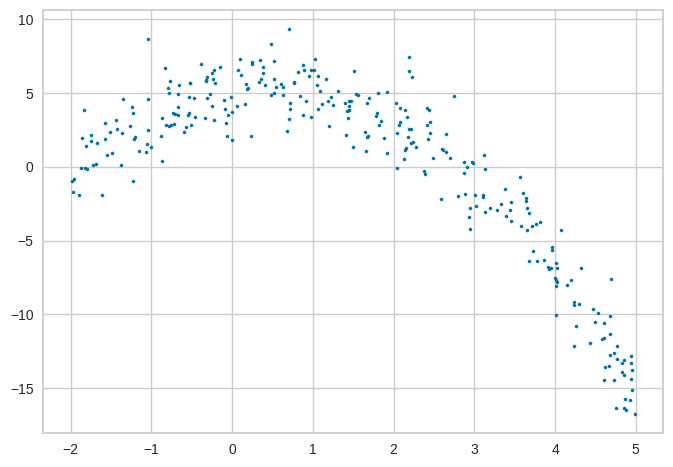

In [10]:
def f(x):
    mu, sigma = 0, 1.5
    return -x**2 + x + 5 + np.random.normal(mu, sigma, 1)

num_points = 300
np.random.seed(100)
    
x = np.random.uniform(-2, 5, num_points)
y = np.array( [f(i) for i in x] )

plt.scatter(x, y, s = 5)

In [5]:
df = pd.DataFrame()
df['x'] = x
df['y'] = y
df.head()

,x,y
0,0.919154,5.438314
1,3.042271,-0.910399
2,-1.999199,-0.004467
3,0.116328,7.791033
4,-0.972709,2.900432


In [6]:
from pycaret.regression import *
s = setup(df, target = 'y')

best = compare_models()

,Description,Value
0,Session id,4002
1,Target,y
2,Target type,Regression
3,Data shape,"(300, 2)"
4,Train data shape,"(209, 2)"
5,Test data shape,"(91, 2)"
6,Numeric features,1
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,1.3682,2.8805,1.6839,0.9023,0.4082,2.0212,0.0100
knn,K Neighbors Regressor,1.3723,2.8550,1.6763,0.9009,0.4135,2.6746,0.0100
lightgbm,Light Gradient Boosting Machine,1.3462,2.9807,1.6949,0.8968,0.4107,1.4929,0.0120
gbr,Gradient Boosting Regressor,1.4615,3.1071,1.7493,0.8947,0.4010,1.9576,0.0100
rf,Random Forest Regressor,1.5100,3.4255,1.8384,0.8824,0.4295,1.9808,0.0280
et,Extra Trees Regressor,1.5530,3.6127,1.8898,0.8772,0.4460,2.0585,0.0240
dt,Decision Tree Regressor,1.7671,4.7126,2.1527,0.8425,0.5008,2.1799,0.0100
huber,Huber Regressor,3.6817,18.5932,4.2656,0.4017,0.8480,10.7132,0.0080
br,Bayesian Ridge,3.6996,18.3623,4.2475,0.4016,0.8283,10.9092,0.0110
omp,Orthogonal Matching Pursuit,3.6999,18.3629,4.2478,0.4012,0.8280,10.9783,0.0080


Processing:   0%|          | 0/77 [00:00<?, ?it/s]

In [7]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [11]:
df2 = pd.DataFrame()
df2['x'] = x
df2['y'] = y
df2.head()

,x,y
0,1.803835,4.979454
1,-0.051414,3.470898
2,0.971623,3.385736
3,3.913433,-6.763547
4,-1.966968,-1.728602


In [12]:
predictions = predict_model(best, data = df2)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,1.4931,3.4232,1.8502,0.9090,0.4000,1.0038


In [ ]:
save_model(best, 'model')

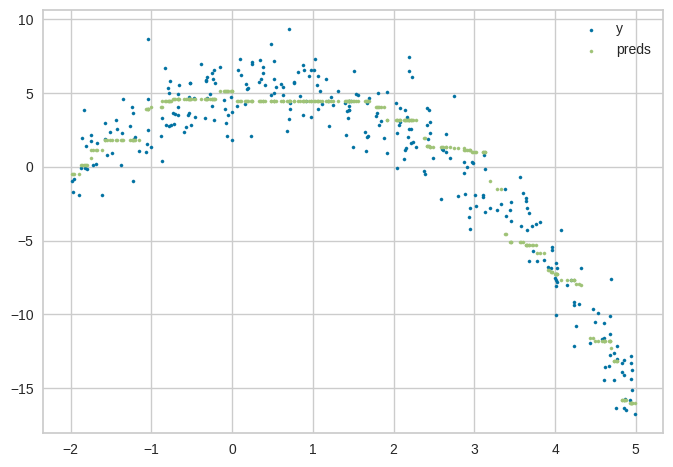

In [14]:
plt.scatter(predictions['x'], predictions['y'], s = 5, label = 'y')
plt.scatter(predictions['x'], predictions['prediction_label'], s = 5, label = 'preds')
plt.legend()